##   Analiza i wizualizacja danych e-commerce
w oparciu o Google Analytics, Pythona i Google Data Studio
<br><br><br>
**Mateusz Muryjas** <br>/ Analityczny<br>
* analityk internetowy z doświadczeniem w data science
* 11 lat w branży IT, z czego 5 lat specjalizacji w analizie i wizualizacji danych
* pomagam firmom analizować i interpretować dane pochodzące ze kanałów on-line i off-line
* odpowiadam za analizę danych marketingowych i sprzedażowych oraz zachowań użytkowników na stronach WWW
<br><br>

### Pobranie i przygotowanie danych do analizy
**Wariant 1** - wykorzystanie Google Analytics Reporting API 

In [4]:
from apiclient.discovery import build
from oauth2client.service_account import ServiceAccountCredentials

#
# KEY_FILE - klucz wygenerowany w Google Cloud umożliwiający połączenie przez API
# VIEW_ID - identyfikator widoku danych w Google Analytics, z którego pobieramy dane 
# Identyfikator widoku znajdziesz wchodząc w Administracja > Ustawienia widoku > Identyfikator widoku danych
#
SCOPES = ['https://www.googleapis.com/auth/analytics.readonly']
KEY_FILE_LOCATION = 'client_secrets.json'
VIEW_ID = '181811334'

#
# Zbudowanie połączenia z API Google analytics
#
credentials = ServiceAccountCredentials.from_json_keyfile_name(KEY_FILE_LOCATION, SCOPES)
analytics = build('analyticsreporting', 'v4', credentials=credentials)

#
# Funkcja print_response odpowiada za sformatowanie pobranych danych do wyświetlenia
# Źródło: Hello Analytics Reporting API v4
#
def print_response(response):
  """Parses and prints the Analytics Reporting API V4 response.

  Args:
    response: An Analytics Reporting API V4 response.
  """
  for report in response.get('reports', []):
    columnHeader = report.get('columnHeader', {})
    dimensionHeaders = columnHeader.get('dimensions', [])
    metricHeaders = columnHeader.get('metricHeader', {}).get('metricHeaderEntries', [])

    for row in report.get('data', {}).get('rows', []):
      dimensions = row.get('dimensions', [])
      dateRangeValues = row.get('metrics', [])

      for header, dimension in zip(dimensionHeaders, dimensions):
        print(header + ': ', dimension)

      for i, values in enumerate(dateRangeValues):
        print('Date range:', str(i))
        for metricHeader, value in zip(metricHeaders, values.get('values')):
          print(metricHeader.get('name') + ':', value)

In [12]:
#
# Pobranie podstawowych danych z Google Analytics za pomocą API
#

report = analytics.reports().batchGet(
  body = {
      'reportRequests': [
            {
                'viewId': VIEW_ID,
                'dateRanges': [
                    {'startDate': '2019-10-15', 'endDate': '2019-11-15'}
                ],
                'metrics': [
                    {'expression': 'ga:sessions'},
                    {"expression": "ga:pageviews"},
                    {"expression": "ga:users"},
                    {"expression": "ga:goalCompletionsAll"}
                ]
            }]
  }
).execute()

rawData = report['reports'][0]['data']['rows']

# Odpowiedź z API Google Analytics
# print(report)
# print(rawData)
#
# Wykorzystanie funkcji z poprzedniego akapitu do przetworzenia danych w czytelny sposób
print_response(report)

Date range: 0
ga:sessions: 7258
ga:pageviews: 8788
ga:users: 3851
ga:goalCompletionsAll: 3396


In [13]:
#
# Pobranie danych z Google Analytics w podziale na wymiary - sesje według urządzeń
#

report = analytics.reports().batchGet(
  body = {
      'reportRequests': [
            {
                'viewId': VIEW_ID,
                'dateRanges': [{'startDate': '2019-10-15', 'endDate': '2019-11-15'}],
                'metrics': [
                    {'expression': 'ga:sessions'}
                ],
                'dimensions': [
                    {'name': 'ga:deviceCategory'}
                ]
            }]
  }
).execute()

print_response(report)

ga:deviceCategory:  desktop
Date range: 0
ga:sessions: 3520
ga:deviceCategory:  mobile
Date range: 0
ga:sessions: 3706
ga:deviceCategory:  tablet
Date range: 0
ga:sessions: 32


In [14]:
#
# Pobranie danych z Google Analytics w podziale na wymiary - sesje według miejscowości
#

report = analytics.reports().batchGet(
  body = {
      'reportRequests': [
            {
                'viewId': VIEW_ID,
                'dateRanges': [{'startDate': '2019-10-15', 'endDate': '2019-11-15'}],
                'metrics': [
                    {'expression': 'ga:sessions'}
                ],
                'dimensions': [
                    {'name': 'ga:city'}
                ]
            }]
  }
).execute()

print_response(report)


ga:city:  (not set)
Date range: 0
ga:sessions: 107
ga:city:  Amsterdam
Date range: 0
ga:sessions: 2
ga:city:  Andrychow
Date range: 0
ga:sessions: 7
ga:city:  Ashburn
Date range: 0
ga:sessions: 9
ga:city:  Bari
Date range: 0
ga:sessions: 1
ga:city:  Beijing
Date range: 0
ga:sessions: 2
ga:city:  Bengaluru
Date range: 0
ga:sessions: 3
ga:city:  Berlin
Date range: 0
ga:sessions: 1
ga:city:  Bialystok
Date range: 0
ga:sessions: 10
ga:city:  Bielsko-Biala
Date range: 0
ga:sessions: 36
ga:city:  Bilgoraj
Date range: 0
ga:sessions: 1
ga:city:  Blonie
Date range: 0
ga:sessions: 1
ga:city:  Boardman
Date range: 0
ga:sessions: 4
ga:city:  Bochnia
Date range: 0
ga:sessions: 9
ga:city:  Bogota
Date range: 0
ga:sessions: 1
ga:city:  Bristol
Date range: 0
ga:sessions: 1
ga:city:  Brzesko
Date range: 0
ga:sessions: 2
ga:city:  Brzozow
Date range: 0
ga:sessions: 1
ga:city:  Bukowina Tatrzanska
Date range: 0
ga:sessions: 2
ga:city:  Busko-Zdroj
Date range: 0
ga:sessions: 1
ga:city:  Bydgoszcz
Date ran

#### Źródło i więcej informacji
Hello Analytics Reporting API v4
https://developers.google.com/analytics/devguides/reporting/core/v4/quickstart/service-py

**Wariant 2** - wykorzystanie Raportów niestandardowych w Google Analytics <br>
(wersja rekomendowana dla osób, które wcześniej nie pracowały z Google Analytics) <br><br>

**Raporty niestandardowe** pozwalają w łatwy sposób wybrać wymiary i metryki, z których ma składać się eksport danych. Dzięki temu możemy stworzyć dowolny raport i pobrać go jako CSV do dalszej obróbki danych. Więcej informacji:
* https://support.google.com/analytics/answer/1033013?hl=pl
* https://support.google.com/analytics/answer/1151300?hl=pl&ref_topic=1012046

### Analiza danych o transakcjach e-commerce
**Część 1** - analiza zamówień w sklepie internetowym

In [16]:
import pandas as pd
import numpy as np

In [18]:
orders = pd.read_excel('ga-ecommerce-dataset.xlsx')

In [19]:
orders.shape

(13504, 20)

In [20]:
orders.head(5)

,InvoiceNo,Revenue,Tax,Shipment,Quantity,Date,InvoiceDate,Hour,Minutes,WeekdayName,WeekdayNum,Weekday,DayType,Source,Medium,Campaign,Device,Country,Region,City
0,202024243,217.13,30.30,42.9,6,20190701,2019-07-01,0,10,Monday,1,1 Monday,Workday,google,cpc,search,mobile,Poland,Masovian Voivodeship,Warsaw
1,202024244,114.61,18.14,14.3,3,20190701,2019-07-01,1,29,Monday,1,1 Monday,Workday,crossselling,referral,(not set),desktop,Poland,Podkarpackie Voivodeship,Rzeszow
2,202024246,90.98,14.96,7.5,2,20190701,2019-07-01,6,0,Monday,1,1 Monday,Workday,google,cpc,pla,mobile,Poland,Greater Poland Voivodeship,Ostrow Wielkopolski
3,202024247,94.84,15.33,7.5,3,20190701,2019-07-01,9,1,Monday,1,1 Monday,Workday,affiliate,referral,(not set),desktop,Poland,Masovian Voivodeship,Warsaw
4,202024250,10.79,1.87,0.0,1,20190701,2019-07-01,9,11,Monday,1,1 Monday,Workday,google,cpc,search,desktop,Poland,Masovian Voivodeship,Plock


In [21]:
orders.Revenue.describe()

count    13502.000000
mean       111.516940
std         63.754392
min          8.070000
25%         67.010000
50%         98.560000
75%        140.200000
max        986.150000
Name: Revenue, dtype: float64

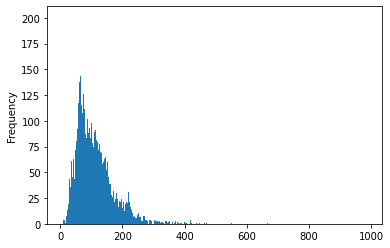

In [22]:
ax = orders.Revenue.plot.hist(bins=986)

In [23]:
orders.Quantity.describe()

count    13504.000000
mean         3.523845
std          2.686850
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        111.000000
Name: Quantity, dtype: float64

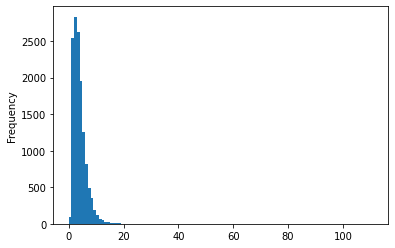

In [24]:
ax = orders.Quantity.plot.hist(bins=111)

In [25]:
orders['Weekday'].value_counts().sort_index()

1 Monday       1875
2 Tuesday      2353
3 Wednesday    1850
4 Thursday     1800
5 Friday       2144
6 Saturday     1450
7 Sunday       2032
Name: Weekday, dtype: int64

In [27]:
orders.groupby('Weekday').agg('mean')['Revenue'].sort_index()

Weekday
1 Monday       111.914427
2 Tuesday      112.551823
3 Wednesday    107.360708
4 Thursday     111.364678
5 Friday       112.181060
6 Saturday     113.681807
7 Sunday       111.625768
Name: Revenue, dtype: float64

In [28]:
orders['Hour'].value_counts().sort_index()

0     307
1     119
2      46
3      26
4      24
5      42
6      82
7     202
8     364
9     606
10    776
11    863
12    980
13    889
14    798
15    703
16    775
17    784
18    839
19    893
20    873
21    966
22    882
23    665
Name: Hour, dtype: int64

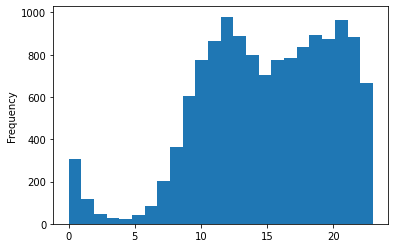

In [29]:
ax = orders.Hour.plot.hist(bins=24)

In [30]:
orders.groupby('Hour').agg('mean')['Revenue'].sort_values(ascending=False)

Hour
2     131.369565
6     124.137927
5     121.117143
0     117.527101
10    116.716198
12    116.084000
1     115.736723
17    114.457691
22    112.366939
11    112.295875
18    111.514988
21    111.174534
16    111.041381
8     110.731181
13    110.671126
14    110.118759
9     109.567178
20    109.461375
19    108.024804
15    108.007710
4     107.939167
23    105.971579
7     104.215495
3     101.029615
Name: Revenue, dtype: float64

In [32]:
mobile_orders = orders[(orders.Device == 'mobile') | (orders.Device == 'tablet')]
len(mobile_orders)

7408

In [33]:
len(mobile_orders)/len(orders)

0.5485781990521327

In [34]:
orders.groupby('Source').agg('mean')['Revenue'].sort_index()

Source
(direct)           105.103427
affiliate          120.287400
bing               105.709231
blog               105.314898
bm.pl              138.950000
crossselling       117.253316
duckduckgo.com      49.390000
ecosia.org         128.220000
facebook           100.641419
forum.gazeta.pl     99.663333
forum.o2.pl         45.710000
google             110.197280
instagram          105.032454
linktr.ee           65.772941
newsletter         110.482215
onet               263.010000
reviewapp           82.392857
salesmanago        122.045179
yahoo              127.193250
youtube            107.398444
Name: Revenue, dtype: float64

In [35]:
orders.groupby('Source').agg('mean')['Revenue'].sort_values(ascending=False)

Source
onet               263.010000
bm.pl              138.950000
ecosia.org         128.220000
yahoo              127.193250
salesmanago        122.045179
affiliate          120.287400
crossselling       117.253316
newsletter         110.482215
google             110.197280
youtube            107.398444
bing               105.709231
blog               105.314898
(direct)           105.103427
instagram          105.032454
facebook           100.641419
forum.gazeta.pl     99.663333
reviewapp           82.392857
linktr.ee           65.772941
duckduckgo.com      49.390000
forum.o2.pl         45.710000
Name: Revenue, dtype: float64

In [36]:
google_cpc = orders[(orders.Source == 'google') & (orders.Medium == 'cpc')]
len(google_cpc)

1867

In [37]:
len(google_cpc)/len(orders)

0.1382553317535545

In [38]:
orders['timestamp'] = pd.to_datetime(orders.InvoiceDate, format="%d/%m/%Y")
orders = orders.set_index(orders.timestamp)

months = orders['InvoiceNo'].resample('M').count()
months

timestamp
2019-07-31     593
2019-08-31     409
2019-09-30     411
2019-10-31     581
2019-11-30     985
2019-12-31     759
2020-01-31     746
2020-02-29    1579
2020-03-31    1556
2020-04-30    1703
2020-05-31    2504
2020-06-30    1678
Freq: M, Name: InvoiceNo, dtype: int64

In [40]:
cites = orders.groupby('City').sum()['Revenue'].sort_values(ascending=False)
cites.head(10)

City
Warsaw       405525.87
Wroclaw      118857.97
Krakow        94906.67
Poznan        78144.04
Gdansk        75547.01
(not set)     61498.44
Katowice      59722.96
Lodz          54642.55
Lublin        33271.81
Szczecin      22940.98
Name: Revenue, dtype: float64

### Analiza danych o transakcjach e-commerce
**Część 2** - analiza koszykowa z wykorzystaniem algorytmu Apriori i reguł asocjacyjnych

In [41]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#
# Pomocnicza funkcja - wykorzystanie w części #2 (algorytm Apriori)
# 
def normalize_sales(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

products = pd.read_excel('ga-products-dataset.xlsx')
products.shape

(42146, 8)

In [43]:
products.columns

Index(['OrderId', 'SKU', 'Product', 'Price', 'Quantity', 'Subtotal',
       'Category', 'Brand'],
      dtype='object')

In [44]:
products.head(10)

,OrderId,SKU,Product,Price,Quantity,Subtotal,Category,Brand
0,202024244,10101,"Kreatywny zestaw do szycia, Jednorożec",42.37,3,127.11,Artykuły papiernicze,Stnux
1,202024244,10102,"Album harmonijkowy, czarny",13.50,2,27.00,Artykuły papiernicze,Creadu
2,202024252,10103,"Markery dekoracyjne, 12 sztuk",23.04,2,46.08,Artykuły szkolne,Stnux
3,202024252,10104,"Pastele suche, 24 kolory",26.21,2,52.42,Artykuły papiernicze,Creadu
4,202024253,10101,"Kreatywny zestaw do szycia, Jednorożec",42.37,2,84.74,Artykuły papiernicze,Stnux
5,202024253,10105,"Modelina, 12 kolorów",21.44,2,42.88,Artykuły szkolne,Astra
6,202024253,10106,"Zestaw brulionów A5, 3 sztuki",21.44,2,42.88,Artykuły szkolne,Herlitz
7,202024253,10107,"Portfelik Kot, Filcowe Robótki",21.44,2,42.88,Artykuły szkolne,Stnux
8,202024255,10101,"Kreatywny zestaw do szycia, Jednorożec",42.37,3,127.11,Artykuły papiernicze,Stnux
9,202024256,10105,"Modelina, 12 kolorów",21.44,2,42.88,Artykuły szkolne,Astra


In [54]:
#
# Tworzymy macierz, w której wiersze reprezentują kolejne zamówienia, a kolumny - produkty, które
# znalazły się w poszczególnych zamówieniach
#
basket = products.groupby(['OrderId', 'Product'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('OrderId')

#
# Zamieniamy liczby kupionych sztuk na wartości true (1) i false (0)
#
normalized_basket = basket.applymap(normalize_sales)

# 
# Wybieramy tylko te transakcje, w których kupiono > 2 produkty
#
basket_to_analyze = normalized_basket[(normalized_basket > 0).sum(axis=1) >= 2]

In [56]:
# 
# Wykorzystanie algorytmu Apriori z biblioteki mlxtend
#
itemsets = apriori(basket_to_analyze, min_support = 0.02, use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)
itemsets['length'] = itemsets['itemsets'].apply(lambda x: len(x))

itemsets

,support,itemsets,length
0,0.172467,"(Pastele suche, 24 kolory)",1
1,0.171696,"(Długopis żelowy, Tattoo, 5 kolorów)",1
2,0.154439,"(Blok do pasteli z gotowymi szkicami, A4)",1
3,0.133713,"(Farby akwarelowe, 12 kolorów)",1
4,0.133038,"(Papier do drukarki, biały)",1
...,...,...,...
86,0.021595,"(Długopis, Parker Jotter Originals Black)",1
87,0.021305,"(Zestaw ołówków 8B-2H, 12 sztuk, Farby wodoroz...",2
88,0.021113,"(Klej w sztyfcie 10 g, Klej w sztyfcie 20 g)",2
89,0.021016,"(Kredki metaliczne, 12 kolorów PRO, Długopis ż...",2


In [48]:
itemsets.head(10)

,support,itemsets,length
0,0.172467,"(Pastele suche, 24 kolory)",1
1,0.171696,"(Długopis żelowy, Tattoo, 5 kolorów)",1
2,0.154439,"(Blok do pasteli z gotowymi szkicami, A4)",1
3,0.133713,"(Farby akwarelowe, 12 kolorów)",1
4,0.133038,"(Papier do drukarki, biały)",1
5,0.131688,"(Farby wodorozcieńczalne, 10 kolorów)",1
6,0.131495,"(Modelina, 12 kolorów)",1
7,0.126482,"(Zestaw brulionów A5, 3 sztuki)",1
8,0.120698,"(Herlitz zeszyt w kratkę, Around the World 5 szt)",1
9,0.109033,"(Kreatywny zestaw do szycia, Jednorożec)",1


In [49]:
#
# Wykorzystanie reguł asocjacyjnych z biblioteki mlxtend do analizy współkupowanych produktów
#
association_rules(itemsets, metric='lift', min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Portfelik Kot, Filcowe Robótki)","(Zestaw brulionów A5, 3 sztuki, Modelina, 12 k...",0.071917,0.042611,0.022559,0.313673,7.361378,0.019494,1.394946
1,"(Zestaw brulionów A5, 3 sztuki, Modelina, 12 k...","(Portfelik Kot, Filcowe Robótki)",0.042611,0.071917,0.022559,0.529412,7.361378,0.019494,1.972175
2,"(Modelina, 12 kolorów, Portfelik Kot, Filcowe ...","(Zestaw brulionów A5, 3 sztuki)",0.029307,0.126482,0.022559,0.769737,6.085732,0.018852,3.793563
3,"(Zestaw brulionów A5, 3 sztuki)","(Modelina, 12 kolorów, Portfelik Kot, Filcowe ...",0.126482,0.029307,0.022559,0.178354,6.085732,0.018852,1.181400
4,(Blok techniczny format A4),(Klej w tubie z aplikatorem 45 g),0.072882,0.085125,0.029307,0.402116,4.723843,0.023103,1.530189
...,...,...,...,...,...,...,...,...,...
65,"(Długopis żelowy, Tattoo, 5 kolorów)","(Farby wodorozcieńczalne, 10 kolorów)",0.171696,0.131688,0.024583,0.143178,1.087251,0.001973,1.013410
66,"(Herlitz zeszyt w kratkę, Around the World 5 szt)","(Długopis żelowy, Tattoo, 5 kolorów)",0.120698,0.171696,0.021980,0.182109,1.060647,0.001257,1.012731
67,"(Długopis żelowy, Tattoo, 5 kolorów)","(Herlitz zeszyt w kratkę, Around the World 5 szt)",0.171696,0.120698,0.021980,0.128018,1.060647,0.001257,1.008395
68,"(Pastele suche, 24 kolory)","(Modelina, 12 kolorów)",0.172467,0.131495,0.023041,0.133594,1.015962,0.000362,1.002423


#### Źródło i dodatkowe materiały
* https://edu.pjwstk.edu.pl/wyklady/adn/scb/wyklad12/w12.htm
* https://medium.com/@jihargifari/how-to-perform-market-basket-analysis-in-python-bd00b745b106

### Dziękuję za uwagę!
<br>**Mateusz Muryjas**<br>
http://pl.linkedin.com/in/mmuryjas